In [ ]:
"""
@Authors:                     @Email:
* Shaiful                     shaiful019@gmail.com
* Rezwanul                    rezwanul.cse@gmail.com
* Oli
* Habibul                     shovon2111@gmail.com
* Tahmid
"""

# Problem: Return to Origin (RTO) Customers Prediction
 Problem class: Supervised Classification
 
 Problem dataset link: Real dataset so no online link.
 
 Problem description: 
 
     RTO (Return to Origin) is a Classification Problem in eCommerce platforms where Many customers cancel their order when the   product is already on shipping. Then customer don't response and the product is return back to office.
 
 Problem Task:
     Have to predict who will Cancel the product order after product is already on shipping.

# Importing libraries

In [155]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import scipy.stats as ss

import random
import calendar
import time

# Feature or column description

COLUMN DESCRIPTIONS:
* Order Id
* User Id
* Order Value (In BDT, amount of the order)
* Payment Type (How, customers paid for it. MPD/MPC = Manual, means Cash on delivery. MPS = Bkash, Rocket type mobile payments. * OPS = online credit card, debit card. ADC = AD Cash (can be earned, can be recharged), EMI = Monthly EMI Purchase )
* District (Where customers are getting delivered)
* OrderSource (Android, Mobile Site or Desktop Site)
* Order Type for Delivery ( Express = Quick delivery and paid more for it, Normal = average delivery)
* Delivery Charge ( for the delivery)
* Order Placing Date (When customer placed the order)
* Order Confirmation date (Office make calls to confirm the order. It call is made late, they might not want the product later)
* IsCartOrder (is it a cart order or single product order)
* OrderFromPromotionalEvent (Is product purchased in discount from a promotional event or not)
* courierService (Courier service used by the customer)
* isRTO ( Order canceled after product is already on shipping )

# Load Dataset & Merging the datasets

In [156]:
df_1 = pd.read_csv("data/RTOdata.csv", parse_dates=['OrderPlacedDay', 'OrderConfirmDayOverPhone'])
df_2 = pd.read_csv("data/RTO_data_new.csv", parse_dates=['OrderPlacedDay', 'OrderConfirmDayOverPhone'])

# Merging
df = pd.concat([df_1, df_2], ignore_index=True)
# type(df_1)
# type(df_2)
df.shape

(20000, 14)

In [157]:
# df.head()
df.tail()

,OrderId,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
19995,2610588,901210,187,MPD,Nilphamari,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,No,Yes,Bangladesh Postal Service ...,Yes
19996,2610586,528636,235,MPS,Sylhet City,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,No,Yes,E-Desh ...,No
19997,2610583,649604,170,MPS,Bagerhat,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,No,Yes,Paperfly ...,No
19998,2610576,967577,409,MPD,Dhaka,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,No,No,E-Desh ...,No
19999,2610572,970326,402,MPD,Moulvibazar,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,No,Yes,Paperfly ...,Yes


# Data Exploration

## Variable Identification

In [ ]:
df.info()

### Drop Unnecessary Columns

In [158]:
df.drop("OrderId", axis=1, inplace=True)
df.tail()

,UserId,OrderValue,PaymentType,District,OrderSource,OrderType,DeliveryCharge,OrderPlacedDay,OrderConfirmDayOverPhone,IsCartOrder,OrderFromPromotionalEvent,courierService,isRTO
19995,901210,187,MPD,Nilphamari,android,normal,60.0,2019-07-17 19:29:00,2019-07-17 13:33:00,No,Yes,Bangladesh Postal Service ...,Yes
19996,528636,235,MPS,Sylhet City,android,normal,0.0,2019-07-17 19:29:00,2019-07-18 05:55:00,No,Yes,E-Desh ...,No
19997,649604,170,MPS,Bagerhat,android,normal,25.0,2019-07-17 19:27:00,2019-07-17 15:42:00,No,Yes,Paperfly ...,No
19998,967577,409,MPD,Dhaka,android,normal,25.0,2019-07-17 19:20:00,2019-07-17 13:28:00,No,No,E-Desh ...,No
19999,970326,402,MPD,Moulvibazar,android,normal,60.0,2019-07-17 19:18:00,2019-07-17 13:45:00,No,Yes,Paperfly ...,Yes


In [ ]:
df.info()

In [ ]:
df.dtypes

## Univariate Analysis

In [ ]:
df.describe()

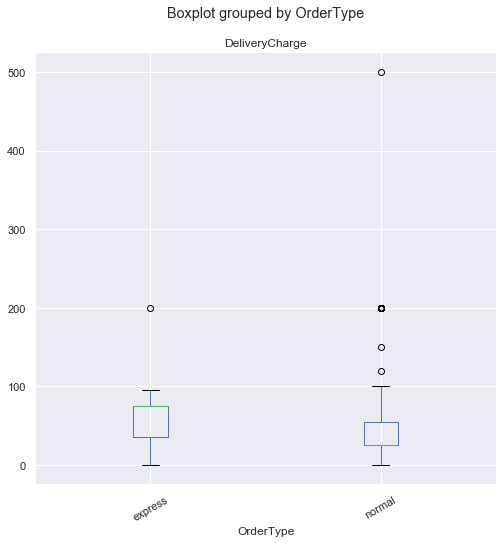

In [159]:
# Delivery charge vs Order Type
df.boxplot('DeliveryCharge','OrderType',rot = 30,figsize=(8,8))

# Insight: 
    ## Express user has average delivery charge of 70-90 where 
    ## Normal user's delivery charge 30 to 50 
    
    ## express user's delivery charge are not spiked like normal user's delivery charge.

# Missing value finding and handling

In [ ]:
# total number of missing values
print(df.isnull().values.sum())

In [ ]:
# the column-wise distribution of null values
print(df.isnull().sum())

# Insight: 
    ## OrderType column has some blanks data 
    ## courierService has lots of data missing as our 1st dataset don't have any.
    ## Also some hidden missing data like OrderSource has -1

In [160]:
# Imputing OrderSource value "-1" with "Others".
df["OrderSource"] = df["OrderSource"].replace(to_replace ="-1", value ="Others")

In [ ]:
# OrderType is imbalanced as Normal user is 15 times more than express users
df.OrderType.value_counts()
# we will handle imbalanced problem later
# imputing missing values 

In [161]:
def count_NaNs(df):
    global valueCounts, nanCounts
    nanCounts = df.isnull().sum()
    for x in list(df):
        valueCounts[x] = df[x].value_counts()

def fill_NaNs_Categorical(col:pd.Series, df: pd.DataFrame):
    """Random but proportional replacement(RBPR) of categoricals."""
    proportion = np.array(valueCounts[col].values) / valueCounts[col].sum() * nanCounts[col]
    proportion = np.around(proportion).astype('int')
    
    """Adjusting proportion."""
    diff = int(nanCounts[col] - np.sum(proportion))
    if diff > 0:
        for x in range(diff):
            idx = random.randint(0, len(proportion) - 1)
            proportion[idx] =  proportion[idx] + 1
    else:
        diff = -diff
        while(diff != 0):
            idx = random.randint(0, len(proportion) - 1)
            if proportion[idx] > 0:
                proportion[idx] =  proportion[idx] - 1
                diff = diff - 1
    
    """Filling NaNs."""
    nan_indexes = df[df[col].isnull()].index.tolist()
    for x in range(len(proportion)):
        if proportion[x] > 0:
            random_subset = random.sample(population = nan_indexes, k = proportion[x])
            df.loc[random_subset, col] = df[col].value_counts().keys()[x]
            nan_indexes = list(set(nan_indexes) - set(random_subset))

In [162]:
# Imputing missing values by RBPR
# Random but proportional replacement(RBPR) of categoricals.
count_NaNs(df)
fill_NaNs_Categorical('OrderType', df)
fill_NaNs_Categorical(' courierService ', df) # dataset column header got tailing and leading space on courierService column

In [163]:
df['DeliveryCharge'].fillna(np.mean, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.tail()

# Preprosscessing

In [ ]:
df["OrderPlacedDayName"] = df.OrderPlacedDay.dt.dayofweek
df["OrderConfirmDayNameOverPhone"] = df.OrderConfirmDayOverPhone.dt.dayofweek

In [ ]:
df.head()

### Encode Categorical column to Numeric

In [171]:
df['District'].value_counts().count()

69

In [172]:
# Replace Values with map values
labels = df['District'].astype('category').cat.categories.tolist()
replace_map_district = {'District' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_district)

{'District': {'Bagerhat': 1, 'Bandarban': 2, 'Barguna': 3, 'Barisal': 4, 'Bhola': 5, 'Bogra': 6, 'Brahmanbaria': 7, 'Chandpur': 8, 'Chapai-Nawabganj': 9, 'Chittagong (Outside City)': 10, 'Chittagong City': 11, 'Chuadanga': 12, 'Comilla': 13, "Cox's-Bazar": 14, 'Dhaka': 15, 'Dhaka (Outside City)': 16, 'Dinajpur': 17, 'Faridpur': 18, 'Feni': 19, 'Gaibandha': 20, 'Gazipur': 21, 'Gopalganj': 22, 'Habiganj': 23, 'Jamalpur': 24, 'Jessore': 25, 'Jhalokati': 26, 'Jhenaidah': 27, 'Joypurhat': 28, 'Khagrachhari': 29, 'Kishoreganj': 30, 'Kurigram': 31, 'Kushtia': 32, 'Lakshmipur': 33, 'Lalmonirhat': 34, 'Madaripur': 35, 'Magura': 36, 'Manikganj': 37, 'Meherpur': 38, 'Moulvibazar': 39, 'Munshiganj': 40, 'Mymensingh': 41, 'Naogaon': 42, 'Narail': 43, 'Narayanganj': 44, 'Narsingdi': 45, 'Natore': 46, 'Netrokona': 47, 'Nilphamari': 48, 'Noakhali': 49, 'Pabna': 50, 'Panchagarh': 51, 'Patuakhali': 52, 'Pirojpur': 53, 'Rajbari': 54, 'Rajshahi (Outside City)': 55, 'Rajshahi City': 56, 'Rangamati': 57, 'R

In [ ]:
df.replace(replace_map_district, inplace=True)

In [ ]:
df.tail()

In [ ]:
%%timeit
pd.Series(np.searchsorted(['No', 'Yes'], df.IsCartOrder.values), df.index, inpl)
pd.Series(np.searchsorted(['No', 'Yes'], df.OrderFromPromotionalEvent.values), df.index)
pd.Series(np.searchsorted(['No', 'Yes'], df.isRTO.values), df.index)
# df.IsCartOrder.eq('yes')
# df.OrderFromPromotionalEvent.map(dict(yes=1, no=0))
# df.isRTO.map(dict(yes=1, no=0))

In [ ]:
%%timeit
df.IsCartOrder = df.IsCartOrder.astype('category').cat.codes
df.OrderFromPromotionalEvent = df.OrderFromPromotionalEvent.astype('category').cat.codes
df.isRTO = df.isRTO.astype('category').cat.codes

In [ ]:
df.head()

In [ ]:
df.OrderType = df.OrderType.astype('category').cat.codes

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['PaymentType', 'OrderSource', ' courierService '])
df_binary = encoder.fit_transform(df)

df_binary.head()

In [ ]:
df_binary.drop(['OrderPlacedDay', 'OrderConfirmDayOverPhone'], axis=1)

In [164]:
def cramers_v(x, y):
    """
    Cramér’s V. It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:
    Similarly to correlation, the output is in the range of [0,1], where 0 means no association and 1 is full association. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
    Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y
    """
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [170]:
cramers_v(df['PaymentType'], df[' courierService '])

0.010825084222638838

### Initial Insight

A)    Delete- Order Id from data set

B)    Normalized- Order Value (deviation mean to max is so high)

C)    Payment Type- consider MPD and MPS only. It covers 96% of whole data set.

D)    Order source- consider android only. It covers 88% of whole data set.

E)    Order Type- normal mode takes more than 90% order

F)    Is Cart Order-No, possible to high chance to cancel

G)    Order from Promotional Event- does not major impact for RTO prediction

H)    Courier Service- null followed by E-Desh is very high to cancel the order

I)     Time interval for confirmation- We may add additional column by One hot/level encoding

[Order Confirm Day Over Phone (-) Order Placed Day]

J)     In terms of delivery charge and order value, below districts customer may chance to cancel the order. But Dhaka followed by Gazipur are the main contributor to accept order and cancel

### Visualization For better understanding